In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import importlib
import matplotlib.dates as mdates

In [2]:
file_path = r'C:\Users\leopo\OneDrive\Documents\coding\projects\tfrrs_scraper\data\2015_to_2024'


data = pd.read_feather(file_path)

In [3]:
pd.set_option('display.max_columns', None)
data.head(3)

,athlete_name,last_name,first_name,athlete_id,year_when_scraped,school,school_scraped_url,division,region,main_conference,other_conferences_found,gender,transfers,has_transferred,meet_name,meet_date,events_competed_in_meet,event,n_event_of_meet,performance,place,event_stage,wind,meet_type,scraped_for_school,athlete_url,year_scraped_roster,year_scraped_season,year_scraped_year,school_roster_size,parsed_date,converted_performance,granular_performance,school_state
0,ALEXANDRIA DONAHUE,Donahue,Alexandria,81_S'YRAM-.TS-TNUOM_EUHANODAIRDNAXELA,SR-4,MOUNT ST. MARY'S,https://tf.tfrrs.org/teams/tf/MD_college_f_Mou...,DI,Mid-Atlantic Region,Metro Atlantic,[IC4A/ECAC],F,None,0,Northeast Conference Championship,"May 2- 3, 2015",3,SP,1,11.74m,9th,F,(+0.0),tf,MOUNT ST. MARY'S,https://www.tfrrs.org/athletes/3723706/Mount_S...,2015,outdoor,2015,27,2015-05-02,0 days 00:00:11.740000,11.74,MD
1,ALEXANDRIA DONAHUE,Donahue,Alexandria,81_S'YRAM-.TS-TNUOM_EUHANODAIRDNAXELA,SR-4,MOUNT ST. MARY'S,https://tf.tfrrs.org/teams/tf/MD_college_f_Mou...,DI,Mid-Atlantic Region,Metro Atlantic,[IC4A/ECAC],F,None,0,Northeast Conference Championship,"May 2- 3, 2015",3,DT,2,34.52m,16th,F,(+0.0),tf,MOUNT ST. MARY'S,https://www.tfrrs.org/athletes/3723706/Mount_S...,2015,outdoor,2015,27,2015-05-02,0 days 00:00:34.520000,34.52,MD
2,ALEXANDRIA DONAHUE,Donahue,Alexandria,81_S'YRAM-.TS-TNUOM_EUHANODAIRDNAXELA,SR-4,MOUNT ST. MARY'S,https://tf.tfrrs.org/teams/tf/MD_college_f_Mou...,DI,Mid-Atlantic Region,Metro Atlantic,[IC4A/ECAC],F,None,0,Northeast Conference Championship,"May 2- 3, 2015",3,HT,3,49.65m,5th,F,(+0.0),tf,MOUNT ST. MARY'S,https://www.tfrrs.org/athletes/3723706/Mount_S...,2015,outdoor,2015,27,2015-05-02,0 days 00:00:49.650000,49.65,MD


In [4]:

# just quickly checking how many women we have available

data[(data['meet_type']=='tf')& (data['gender']=='F')]['athlete_id'].nunique()

131157

In [27]:
# get unique 5k runners


kkkkk_athlete_ids = data[(data['meet_type'] == 'tf') & (data['event'] == '5000')]['athlete_id'].unique()

print(f'number of unique 5k runners: {len(kkkkk_athlete_ids)}')


number of unique 5k runners: 57363


In [42]:
# filter to only the relevant runners

relevant_runners = data[data['athlete_id'].isin(kkkkk_athlete_ids)]

relevant_runners.head(3)

,athlete_name,last_name,first_name,athlete_id,year_when_scraped,school,school_scraped_url,division,region,main_conference,other_conferences_found,gender,transfers,has_transferred,meet_name,meet_date,events_competed_in_meet,event,n_event_of_meet,performance,place,event_stage,wind,meet_type,scraped_for_school,athlete_url,year_scraped_roster,year_scraped_season,year_scraped_year,school_roster_size,parsed_date,converted_performance,granular_performance,school_state
111,MCKENZIE DOYLE,Doyle,McKenzie,41_S'YRAM-.TS-TNUOM_ELYODEIZNEKCM,SR-4,MOUNT ST. MARY'S,https://tf.tfrrs.org/teams/tf/MD_college_f_Mou...,DI,Mid-Atlantic Region,Metro Atlantic,[IC4A/ECAC],F,None,0,Northeast Conference Championship,"May 2- 3, 2015",2,5000,1,19:10.93,18th,F,,tf,MOUNT ST. MARY'S,https://www.tfrrs.org/athletes/3723707/Mount_S...,2015,outdoor,2015,27,2015-05-02,0 days 00:19:10.930000,1150.93,MD
112,MCKENZIE DOYLE,Doyle,McKenzie,41_S'YRAM-.TS-TNUOM_ELYODEIZNEKCM,SR-4,MOUNT ST. MARY'S,https://tf.tfrrs.org/teams/tf/MD_college_f_Mou...,DI,Mid-Atlantic Region,Metro Atlantic,[IC4A/ECAC],F,None,0,Northeast Conference Championship,"May 2- 3, 2015",2,"10,000",2,40:28.01,14th,F,,tf,MOUNT ST. MARY'S,https://www.tfrrs.org/athletes/3723707/Mount_S...,2015,outdoor,2015,27,2015-05-02,0 days 00:40:28.010000,2428.01,MD
113,MCKENZIE DOYLE,Doyle,McKenzie,41_S'YRAM-.TS-TNUOM_ELYODEIZNEKCM,SR-4,MOUNT ST. MARY'S,https://tf.tfrrs.org/teams/tf/MD_college_f_Mou...,DI,Mid-Atlantic Region,Metro Atlantic,[IC4A/ECAC],F,None,0,Mason Spring Invitational,"Apr 11, 2015",1,5000,1,18:28.82,18th,F,,tf,MOUNT ST. MARY'S,https://www.tfrrs.org/athletes/3723707/Mount_S...,2015,outdoor,2015,27,2015-04-11,0 days 00:18:28.820000,1108.82,MD


In [43]:
# Step 1: Filter the data for event == 5000 and meet_type == 'tf'
only_5000 = relevant_runners[(relevant_runners['event'] == '5000') & (relevant_runners['meet_type'] == 'tf')]

# Step 2: Remove athletes whose only 5000-meter entry has NaN in granular_performance
athlete_counts = only_5000.groupby('athlete_id').size()
athletes_to_drop = athlete_counts[athlete_counts == 1].index

# Filter out those athletes whose performance is NaN
only_5000_cleaned = only_5000[~((only_5000['athlete_id'].isin(athletes_to_drop)) & (only_5000['granular_performance'].isna()))]

# Step 3: Sort by athlete_id and granular_performance (ascending for fastest), disregarding NaN values
sorted_for_athletes = only_5000_cleaned.sort_values(by=['athlete_id', 'granular_performance'], na_position='last')

# Step 4: Get the fastest performance for each athlete
sample = sorted_for_athletes.groupby('athlete_id').head(1)[['athlete_id', 'granular_performance', 'parsed_date']]

# Reset index if needed
sample.reset_index(drop=True, inplace=True)


In [44]:


sample.head(10)

,athlete_id,granular_performance,parsed_date
0,01_).AG(-LEUNAMME_THGIRWCAZ,1021.72,2022-04-16
1,01_).ALF(-IMAIM_HCOKAILUJ,1164.62,2014-03-21
2,01_).AP(-AINROFILAC_AZZEPKCIN,952.57,2012-02-18
3,01_).AP(-AINROFILAC_EBOJNOSAM,957.98,2021-04-03
4,01_).AP(-AINROFILAC_ECNAVARAS,1163.20,2019-03-30
5,01_).AP(-AINROFILAC_GNUOYTTAM,1002.68,2019-04-06
6,01_).AP(-AINROFILAC_ONAILUEOJ,938.78,2019-04-13
7,01_).AP(-AINROFILAC_TNEKYBLOK,967.74,2024-03-29
8,01_).AP(-ANAIDNI_ADOHNORAA,999.56,2018-04-21
9,01_).AP(-ANAIDNI_ALLESTTAM,1012.82,2017-12-01


In [45]:
# check the datatypes

sample.dtypes

athlete_id                      object
granular_performance           float64
parsed_date             datetime64[ns]
dtype: object

(array([1.1700e+03, 8.0490e+03, 1.1923e+04, 9.4500e+03, 8.4610e+03,
        7.0710e+03, 4.7180e+03, 2.4260e+03, 1.1170e+03, 5.0100e+02,
        2.0500e+02, 7.3000e+01, 3.6000e+01, 1.7000e+01, 1.2000e+01,
        5.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 777.14  ,  842.7005,  908.261 ,  973.8215, 1039.382 , 1104.9425,
        1170.503 , 1236.0635, 1301.624 , 1367.1845, 1432.745 , 1498.3055,
        1563.866 , 1629.4265, 1694.987 , 1760.5475, 1826.108 , 1891.6685,
        1957.229 , 2022.7895, 2088.35  ]),
 <BarContainer object of 20 artists>)

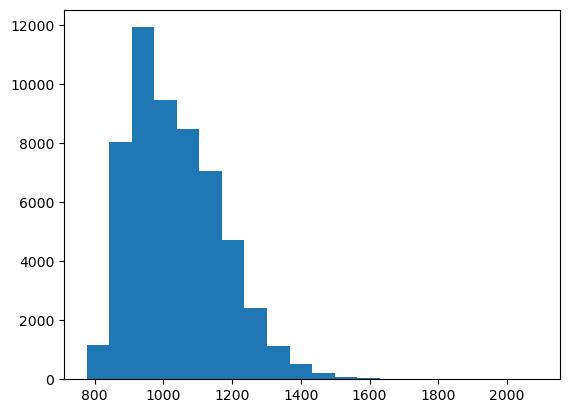

In [46]:
plt.hist(sample['granular_performance'],bins=20)

In [47]:
# Step 1: Find athlete_ids with conflicting genders
conflicting_athletes = (
    relevant_runners.groupby('athlete_id')['gender']
    .nunique()
)
conflicting_athletes = conflicting_athletes[conflicting_athletes > 1].index

# Step 2: Build a clean athlete_id -> gender mapping, excluding conflicts
athlete_gender = (
    relevant_runners[~relevant_runners['athlete_id'].isin(conflicting_athletes)]
    .groupby('athlete_id', as_index=False)['gender']
    .first()
)

# Step 3: Merge gender into sample (only non-conflicting athletes remain)
sample = sample.merge(athlete_gender, on='athlete_id', how='left')


In [48]:
sample

,athlete_id,granular_performance,parsed_date,gender
0,01_).AG(-LEUNAMME_THGIRWCAZ,1021.72,2022-04-16,M
1,01_).ALF(-IMAIM_HCOKAILUJ,1164.62,2014-03-21,F
2,01_).AP(-AINROFILAC_AZZEPKCIN,952.57,2012-02-18,M
3,01_).AP(-AINROFILAC_EBOJNOSAM,957.98,2021-04-03,M
4,01_).AP(-AINROFILAC_ECNAVARAS,1163.20,2019-03-30,F
...,...,...,...,...
55524,9_YTREBIL_WERDNAYR,820.82,2022-04-01,M
55525,9_YVAN_AEDONAYR,900.68,2022-03-26,M
55526,9_ZURC-ATNAS-CU_ELREMOEL,972.55,2018-05-12,M
55527,9_ZURC-ATNAS-CU_YOWTYBBA,1211.64,2022-04-15,F


In [49]:
# Helper function: get fastest performance & days before 5k PR
def get_fastest_before_5k(df, event_name, col_prefix, sample_df):
    # Join with 5k PR date
    df = df[df['event'] == event_name].merge(
        sample_df[['athlete_id', 'parsed_date']], 
        on='athlete_id', 
        how='inner', 
        suffixes=('', '_5k')
    )
    
    # Keep only performances before the 5k PR date
    df = df[df['parsed_date'] < df['parsed_date_5k']]
    
    # Pick fastest per athlete
    fastest = (
        df.sort_values(by=['athlete_id', 'granular_performance'])
          .groupby('athlete_id', as_index=False)
          .first()[['athlete_id', 'granular_performance', 'parsed_date', 'parsed_date_5k']]
    )
    
    # Compute days before 5k PR
    fastest[col_prefix + '_days_before_5k'] = (
        (fastest['parsed_date_5k'] - fastest['parsed_date']).dt.days
    )
    
    # Keep only needed columns
    fastest = fastest.rename(columns={'granular_performance': col_prefix})
    fastest = fastest[['athlete_id', col_prefix, col_prefix + '_days_before_5k']]
    
    return fastest


# Build features for each target event (with exact event names!)
fastest_10000 = get_fastest_before_5k(relevant_runners, '10,000', 'fastest_10000', sample)
fastest_mile  = get_fastest_before_5k(relevant_runners, 'Mile',   'fastest_mile',  sample)
fastest_1500  = get_fastest_before_5k(relevant_runners, '1500',   'fastest_1500',  sample)
fastest_800   = get_fastest_before_5k(relevant_runners, '800',    'fastest_800',   sample)

# Merge into sample
sample = (
    sample.merge(fastest_10000, on='athlete_id', how='left')
          .merge(fastest_mile,  on='athlete_id', how='left')
          .merge(fastest_1500,  on='athlete_id', how='left')
          .merge(fastest_800,   on='athlete_id', how='left')
)


In [50]:
sample.head(30)

,athlete_id,granular_performance,parsed_date,gender,fastest_10000,fastest_10000_days_before_5k,fastest_mile,fastest_mile_days_before_5k,fastest_1500,fastest_1500_days_before_5k,fastest_800,fastest_800_days_before_5k
0,01_).AG(-LEUNAMME_THGIRWCAZ,1021.72,2022-04-16,M,2139.98,393.0,294.85,427.0,NaN,NaN,NaN,NaN
1,01_).ALF(-IMAIM_HCOKAILUJ,1164.62,2014-03-21,F,NaN,NaN,NaN,NaN,341.62,735.0,NaN,NaN
2,01_).AP(-AINROFILAC_AZZEPKCIN,952.57,2012-02-18,M,NaN,NaN,272.57,22.0,NaN,NaN,NaN,NaN
3,01_).AP(-AINROFILAC_EBOJNOSAM,957.98,2021-04-03,M,NaN,NaN,275.04,406.0,258.63,7.0,NaN,NaN
4,01_).AP(-AINROFILAC_ECNAVARAS,1163.20,2019-03-30,F,NaN,NaN,344.17,57.0,317.18,7.0,160.15,64.0
5,01_).AP(-AINROFILAC_GNUOYTTAM,1002.68,2019-04-06,M,NaN,NaN,NaN,NaN,270.75,350.0,NaN,NaN
6,01_).AP(-AINROFILAC_ONAILUEOJ,938.78,2019-04-13,M,NaN,NaN,265.92,56.0,251.23,21.0,125.65,743.0
7,01_).AP(-AINROFILAC_TNEKYBLOK,967.74,2024-03-29,M,NaN,NaN,288.26,433.0,267.67,13.0,NaN,NaN
8,01_).AP(-ANAIDNI_ADOHNORAA,999.56,2018-04-21,M,NaN,NaN,289.49,78.0,NaN,NaN,NaN,NaN
9,01_).AP(-ANAIDNI_ALLESTTAM,1012.82,2017-12-01,M,2222.48,216.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Step 1: Find athlete_ids with conflicting states
conflicting_athletes = (
    relevant_runners.groupby('athlete_id')['school_state']
    .nunique()
)
conflicting_athletes = conflicting_athletes[conflicting_athletes > 1].index

# Step 2: Build a clean athlete_id -> state mapping, excluding conflicts
athlete_state = (
    relevant_runners[~relevant_runners['athlete_id'].isin(conflicting_athletes)]
    .groupby('athlete_id', as_index=False)['school_state']
    .first()
)

# Step 3: Merge state into sample (only non-conflicting athletes remain)
sample = sample.merge(athlete_state, on='athlete_id', how='left')


In [52]:
sample.head(10)

,athlete_id,granular_performance,parsed_date,gender,fastest_10000,fastest_10000_days_before_5k,fastest_mile,fastest_mile_days_before_5k,fastest_1500,fastest_1500_days_before_5k,fastest_800,fastest_800_days_before_5k,school_state
0,01_).AG(-LEUNAMME_THGIRWCAZ,1021.72,2022-04-16,M,2139.98,393.0,294.85,427.0,NaN,NaN,NaN,NaN,GA
1,01_).ALF(-IMAIM_HCOKAILUJ,1164.62,2014-03-21,F,NaN,NaN,NaN,NaN,341.62,735.0,NaN,NaN,FL
2,01_).AP(-AINROFILAC_AZZEPKCIN,952.57,2012-02-18,M,NaN,NaN,272.57,22.0,NaN,NaN,NaN,NaN,PA
3,01_).AP(-AINROFILAC_EBOJNOSAM,957.98,2021-04-03,M,NaN,NaN,275.04,406.0,258.63,7.0,NaN,NaN,PA
4,01_).AP(-AINROFILAC_ECNAVARAS,1163.20,2019-03-30,F,NaN,NaN,344.17,57.0,317.18,7.0,160.15,64.0,PA
5,01_).AP(-AINROFILAC_GNUOYTTAM,1002.68,2019-04-06,M,NaN,NaN,NaN,NaN,270.75,350.0,NaN,NaN,PA
6,01_).AP(-AINROFILAC_ONAILUEOJ,938.78,2019-04-13,M,NaN,NaN,265.92,56.0,251.23,21.0,125.65,743.0,PA
7,01_).AP(-AINROFILAC_TNEKYBLOK,967.74,2024-03-29,M,NaN,NaN,288.26,433.0,267.67,13.0,NaN,NaN,PA
8,01_).AP(-ANAIDNI_ADOHNORAA,999.56,2018-04-21,M,NaN,NaN,289.49,78.0,NaN,NaN,NaN,NaN,PA
9,01_).AP(-ANAIDNI_ALLESTTAM,1012.82,2017-12-01,M,2222.48,216.0,NaN,NaN,NaN,NaN,NaN,NaN,PA


In [53]:
for event in ['10000', 'mile', '1500', '800']:
    sample[f'has_{event}'] = sample[f'fastest_{event}'].notna().astype(int)


In [54]:
sample.head(10)

,athlete_id,granular_performance,parsed_date,gender,fastest_10000,fastest_10000_days_before_5k,fastest_mile,fastest_mile_days_before_5k,fastest_1500,fastest_1500_days_before_5k,fastest_800,fastest_800_days_before_5k,school_state,has_10000,has_mile,has_1500,has_800
0,01_).AG(-LEUNAMME_THGIRWCAZ,1021.72,2022-04-16,M,2139.98,393.0,294.85,427.0,NaN,NaN,NaN,NaN,GA,1,1,0,0
1,01_).ALF(-IMAIM_HCOKAILUJ,1164.62,2014-03-21,F,NaN,NaN,NaN,NaN,341.62,735.0,NaN,NaN,FL,0,0,1,0
2,01_).AP(-AINROFILAC_AZZEPKCIN,952.57,2012-02-18,M,NaN,NaN,272.57,22.0,NaN,NaN,NaN,NaN,PA,0,1,0,0
3,01_).AP(-AINROFILAC_EBOJNOSAM,957.98,2021-04-03,M,NaN,NaN,275.04,406.0,258.63,7.0,NaN,NaN,PA,0,1,1,0
4,01_).AP(-AINROFILAC_ECNAVARAS,1163.20,2019-03-30,F,NaN,NaN,344.17,57.0,317.18,7.0,160.15,64.0,PA,0,1,1,1
5,01_).AP(-AINROFILAC_GNUOYTTAM,1002.68,2019-04-06,M,NaN,NaN,NaN,NaN,270.75,350.0,NaN,NaN,PA,0,0,1,0
6,01_).AP(-AINROFILAC_ONAILUEOJ,938.78,2019-04-13,M,NaN,NaN,265.92,56.0,251.23,21.0,125.65,743.0,PA,0,1,1,1
7,01_).AP(-AINROFILAC_TNEKYBLOK,967.74,2024-03-29,M,NaN,NaN,288.26,433.0,267.67,13.0,NaN,NaN,PA,0,1,1,0
8,01_).AP(-ANAIDNI_ADOHNORAA,999.56,2018-04-21,M,NaN,NaN,289.49,78.0,NaN,NaN,NaN,NaN,PA,0,1,0,0
9,01_).AP(-ANAIDNI_ALLESTTAM,1012.82,2017-12-01,M,2222.48,216.0,NaN,NaN,NaN,NaN,NaN,NaN,PA,1,0,0,0


In [55]:
# Step 1: Find athlete_ids with conflicting divisions
conflicting_athletes = (
    relevant_runners.groupby('athlete_id')['division']
    .nunique()
)
conflicting_athletes = conflicting_athletes[conflicting_athletes > 1].index

# Step 2: Build a clean athlete_id -> state mapping, excluding conflicts
athlete_division = (
    relevant_runners[~relevant_runners['athlete_id'].isin(conflicting_athletes)]
    .groupby('athlete_id', as_index=False)['division']
    .first()
)

# Step 3: Merge division into sample (only non-conflicting athletes remain)
sample = sample.merge(athlete_division, on='athlete_id', how='left')


In [57]:
sample.head(20)

,athlete_id,granular_performance,parsed_date,gender,fastest_10000,fastest_10000_days_before_5k,fastest_mile,fastest_mile_days_before_5k,fastest_1500,fastest_1500_days_before_5k,fastest_800,fastest_800_days_before_5k,school_state,has_10000,has_mile,has_1500,has_800,division
0,01_).AG(-LEUNAMME_THGIRWCAZ,1021.72,2022-04-16,M,2139.98,393.0,294.85,427.0,NaN,NaN,NaN,NaN,GA,1,1,0,0,DII
1,01_).ALF(-IMAIM_HCOKAILUJ,1164.62,2014-03-21,F,NaN,NaN,NaN,NaN,341.62,735.0,NaN,NaN,FL,0,0,1,0,DI
2,01_).AP(-AINROFILAC_AZZEPKCIN,952.57,2012-02-18,M,NaN,NaN,272.57,22.0,NaN,NaN,NaN,NaN,PA,0,1,0,0,DII
3,01_).AP(-AINROFILAC_EBOJNOSAM,957.98,2021-04-03,M,NaN,NaN,275.04,406.0,258.63,7.0,NaN,NaN,PA,0,1,1,0,DII
4,01_).AP(-AINROFILAC_ECNAVARAS,1163.20,2019-03-30,F,NaN,NaN,344.17,57.0,317.18,7.0,160.15,64.0,PA,0,1,1,1,DII
5,01_).AP(-AINROFILAC_GNUOYTTAM,1002.68,2019-04-06,M,NaN,NaN,NaN,NaN,270.75,350.0,NaN,NaN,PA,0,0,1,0,DII
6,01_).AP(-AINROFILAC_ONAILUEOJ,938.78,2019-04-13,M,NaN,NaN,265.92,56.0,251.23,21.0,125.65,743.0,PA,0,1,1,1,DII
7,01_).AP(-AINROFILAC_TNEKYBLOK,967.74,2024-03-29,M,NaN,NaN,288.26,433.0,267.67,13.0,NaN,NaN,PA,0,1,1,0,DII
8,01_).AP(-ANAIDNI_ADOHNORAA,999.56,2018-04-21,M,NaN,NaN,289.49,78.0,NaN,NaN,NaN,NaN,PA,0,1,0,0,DII
9,01_).AP(-ANAIDNI_ALLESTTAM,1012.82,2017-12-01,M,2222.48,216.0,NaN,NaN,NaN,NaN,NaN,NaN,PA,1,0,0,0,DII


In [58]:
# drop divisions that are wrong


# Keep only specific divisions
valid_divisions = ['DI', 'DII', 'DIII', 'NAIA']

sample = sample[sample['division'].isin(valid_divisions)].reset_index(drop=True)


In [59]:
sample.shape

(46071, 18)

In [60]:
# Step 1: Rename parsed_date to pr_date
sample = sample.rename(columns={'parsed_date': 'pr_date'})

# Step 2: Find the earliest competition date per athlete in relevant_runners
earliest_dates = (
    relevant_runners.groupby('athlete_id', as_index=False)['parsed_date']
    .min()
    .rename(columns={'parsed_date': 'first_date'})
)

# Step 3: Merge earliest dates into sample
sample = sample.merge(earliest_dates, on='athlete_id', how='left')

# Step 4: Compute seniority in days
sample['seniority_days'] = (sample['pr_date'] - sample['first_date']).dt.days

# (Optional) drop helper column if you don’t need it
# sample = sample.drop(columns=['first_date'])


In [61]:
sample.head(10)

,athlete_id,granular_performance,pr_date,gender,fastest_10000,fastest_10000_days_before_5k,fastest_mile,fastest_mile_days_before_5k,fastest_1500,fastest_1500_days_before_5k,fastest_800,fastest_800_days_before_5k,school_state,has_10000,has_mile,has_1500,has_800,division,first_date,seniority_days
0,01_).AG(-LEUNAMME_THGIRWCAZ,1021.72,2022-04-16,M,2139.98,393.0,294.85,427.0,NaN,NaN,NaN,NaN,GA,1,1,0,0,DII,2021-01-16,455
1,01_).ALF(-IMAIM_HCOKAILUJ,1164.62,2014-03-21,F,NaN,NaN,NaN,NaN,341.62,735.0,NaN,NaN,FL,0,0,1,0,DI,2012-03-16,735
2,01_).AP(-AINROFILAC_AZZEPKCIN,952.57,2012-02-18,M,NaN,NaN,272.57,22.0,NaN,NaN,NaN,NaN,PA,0,1,0,0,DII,2012-01-27,22
3,01_).AP(-AINROFILAC_EBOJNOSAM,957.98,2021-04-03,M,NaN,NaN,275.04,406.0,258.63,7.0,NaN,NaN,PA,0,1,1,0,DII,2017-09-01,1310
4,01_).AP(-AINROFILAC_ECNAVARAS,1163.20,2019-03-30,F,NaN,NaN,344.17,57.0,317.18,7.0,160.15,64.0,PA,0,1,1,1,DII,2017-09-01,575
5,01_).AP(-AINROFILAC_GNUOYTTAM,1002.68,2019-04-06,M,NaN,NaN,NaN,NaN,270.75,350.0,NaN,NaN,PA,0,0,1,0,DII,2017-09-02,581
6,01_).AP(-AINROFILAC_ONAILUEOJ,938.78,2019-04-13,M,NaN,NaN,265.92,56.0,251.23,21.0,125.65,743.0,PA,0,1,1,1,DII,2016-09-03,952
7,01_).AP(-AINROFILAC_TNEKYBLOK,967.74,2024-03-29,M,NaN,NaN,288.26,433.0,267.67,13.0,NaN,NaN,PA,0,1,1,0,DII,2022-09-10,566
8,01_).AP(-ANAIDNI_ADOHNORAA,999.56,2018-04-21,M,NaN,NaN,289.49,78.0,NaN,NaN,NaN,NaN,PA,0,1,0,0,DII,2017-09-02,231
9,01_).AP(-ANAIDNI_ALLESTTAM,1012.82,2017-12-01,M,2222.48,216.0,NaN,NaN,NaN,NaN,NaN,NaN,PA,1,0,0,0,DII,2016-09-02,455


In [62]:
# Step 1: Make sure pr_date is aligned for all athletes
pr_dates = sample[['athlete_id', 'pr_date']]

# Step 2: Join pr_date onto relevant_runners
df_with_pr = relevant_runners.merge(pr_dates, on='athlete_id', how='inner')

# Step 3: Keep only races before the 5k PR
df_with_pr = df_with_pr[df_with_pr['parsed_date'] < df_with_pr['pr_date']]

# Step 4: Compute differences in days
df_with_pr['days_before_pr'] = (df_with_pr['pr_date'] - df_with_pr['parsed_date']).dt.days

# Step 5: Aggregate features
event_features = df_with_pr.groupby('athlete_id').agg(
    events_30d   = ('days_before_pr', lambda x: (x <= 30).sum()),
    events_60d   = ('days_before_pr', lambda x: (x <= 60).sum()),
    events_180d  = ('days_before_pr', lambda x: (x <= 180).sum()),
    events_365d  = ('days_before_pr', lambda x: (x <= 365).sum()),
    events_total = ('days_before_pr', 'count')
).reset_index()

# Step 6: Merge back into sample
sample = sample.merge(event_features, on='athlete_id', how='left')


In [63]:
sample.head(10)

,athlete_id,granular_performance,pr_date,gender,fastest_10000,fastest_10000_days_before_5k,fastest_mile,fastest_mile_days_before_5k,fastest_1500,fastest_1500_days_before_5k,fastest_800,fastest_800_days_before_5k,school_state,has_10000,has_mile,has_1500,has_800,division,first_date,seniority_days,events_30d,events_60d,events_180d,events_365d,events_total
0,01_).AG(-LEUNAMME_THGIRWCAZ,1021.72,2022-04-16,M,2139.98,393.0,294.85,427.0,NaN,NaN,NaN,NaN,GA,1,1,0,0,DII,2021-01-16,455,2.0,3.0,4.0,4.0,12.0
1,01_).ALF(-IMAIM_HCOKAILUJ,1164.62,2014-03-21,F,NaN,NaN,NaN,NaN,341.62,735.0,NaN,NaN,FL,0,0,1,0,DI,2012-03-16,735,0.0,0.0,1.0,3.0,11.0
2,01_).AP(-AINROFILAC_AZZEPKCIN,952.57,2012-02-18,M,NaN,NaN,272.57,22.0,NaN,NaN,NaN,NaN,PA,0,1,0,0,DII,2012-01-27,22,3.0,3.0,3.0,3.0,3.0
3,01_).AP(-AINROFILAC_EBOJNOSAM,957.98,2021-04-03,M,NaN,NaN,275.04,406.0,258.63,7.0,NaN,NaN,PA,0,1,1,0,DII,2017-09-01,1310,3.0,3.0,3.0,3.0,16.0
4,01_).AP(-AINROFILAC_ECNAVARAS,1163.20,2019-03-30,F,NaN,NaN,344.17,57.0,317.18,7.0,160.15,64.0,PA,0,1,1,1,DII,2017-09-01,575,1.0,4.0,11.0,15.0,16.0
5,01_).AP(-AINROFILAC_GNUOYTTAM,1002.68,2019-04-06,M,NaN,NaN,NaN,NaN,270.75,350.0,NaN,NaN,PA,0,0,1,0,DII,2017-09-02,581,2.0,2.0,5.0,13.0,21.0
6,01_).AP(-AINROFILAC_ONAILUEOJ,938.78,2019-04-13,M,NaN,NaN,265.92,56.0,251.23,21.0,125.65,743.0,PA,0,1,1,1,DII,2016-09-03,952,3.0,6.0,13.0,22.0,50.0
7,01_).AP(-AINROFILAC_TNEKYBLOK,967.74,2024-03-29,M,NaN,NaN,288.26,433.0,267.67,13.0,NaN,NaN,PA,0,1,1,0,DII,2022-09-10,566,2.0,3.0,6.0,12.0,23.0
8,01_).AP(-ANAIDNI_ADOHNORAA,999.56,2018-04-21,M,NaN,NaN,289.49,78.0,NaN,NaN,NaN,NaN,PA,0,1,0,0,DII,2017-09-02,231,2.0,2.0,6.0,11.0,11.0
9,01_).AP(-ANAIDNI_ALLESTTAM,1012.82,2017-12-01,M,2222.48,216.0,NaN,NaN,NaN,NaN,NaN,NaN,PA,1,0,0,0,DII,2016-09-02,455,0.0,2.0,4.0,11.0,18.0


In [66]:
sample.drop(columns=['first_date'], inplace=True)
